<a href="https://colab.research.google.com/github/SarkarPriyanshu/Machine-Learning-Models/blob/main/ExponentialSmoothing_%26_ARIMA_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libaries Imports

In [58]:
!pip install -q pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.3 MB/s eta 0:00:00


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error,r2_score

## Data loading

In [35]:
df = pd.read_csv('/content/train.csv',parse_dates=['Date']).drop(columns=['store',	'product'],axis=1)

## Basic Analysis & Preprocessing

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         230090 non-null  datetime64[ns]
 1   number_sold  230090 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.5 MB


In [37]:
df = df.groupby('Date').sum()

In [38]:
df = df.resample(rule='MS').sum()

<Axes: xlabel='Date'>

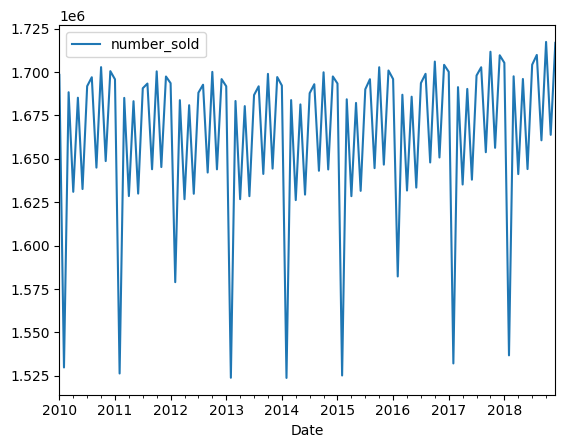

In [39]:
df.plot()

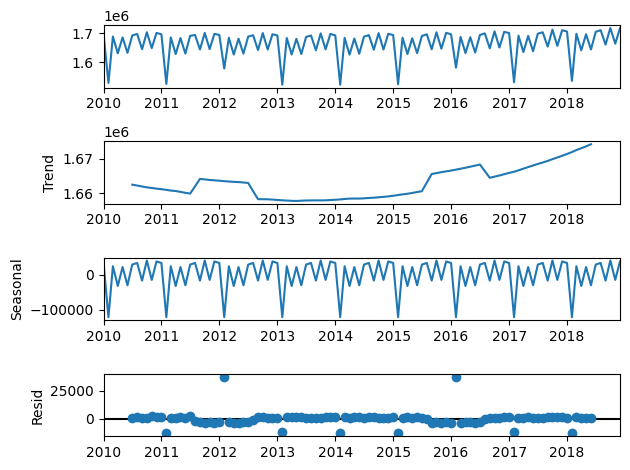

In [44]:
result = seasonal_decompose(df,model='additive')
result.plot()
plt.show()

## Model building & Evaluation

### Exponential Smoothing Model

In [56]:
train = df[:98]
test = df[98:]

<Axes: xlabel='Date'>

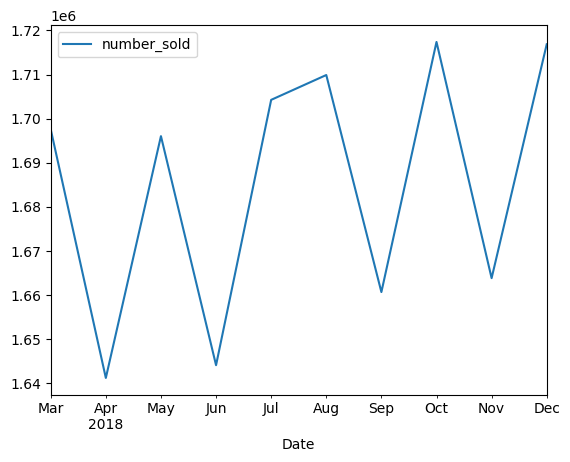

In [63]:
test.plot()

In [62]:
es_model = ExponentialSmoothing(train.number_sold,trend='add',seasonal='add',seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


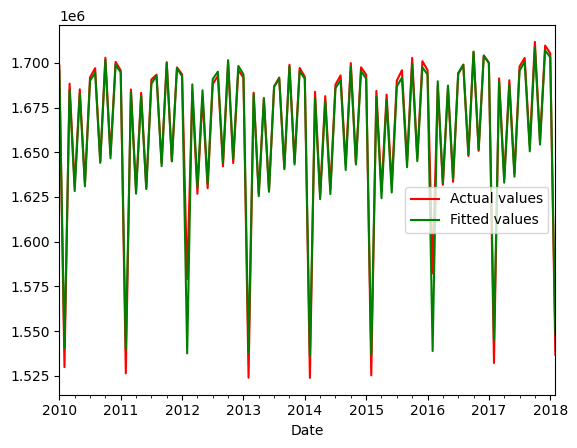

In [69]:
train['number_sold'].plot(color='red',label='Actual values')
es_model.fittedvalues.plot(color='green',label='Fitted values')
plt.legend()
plt.show()

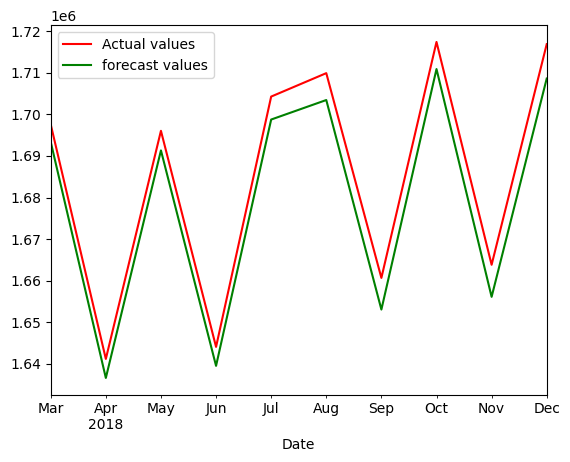

In [76]:
test['number_sold'].plot(color='red',label='Actual values')
es_model.forecast(10).plot(color='green',label='forecast values')
plt.legend()
plt.show()

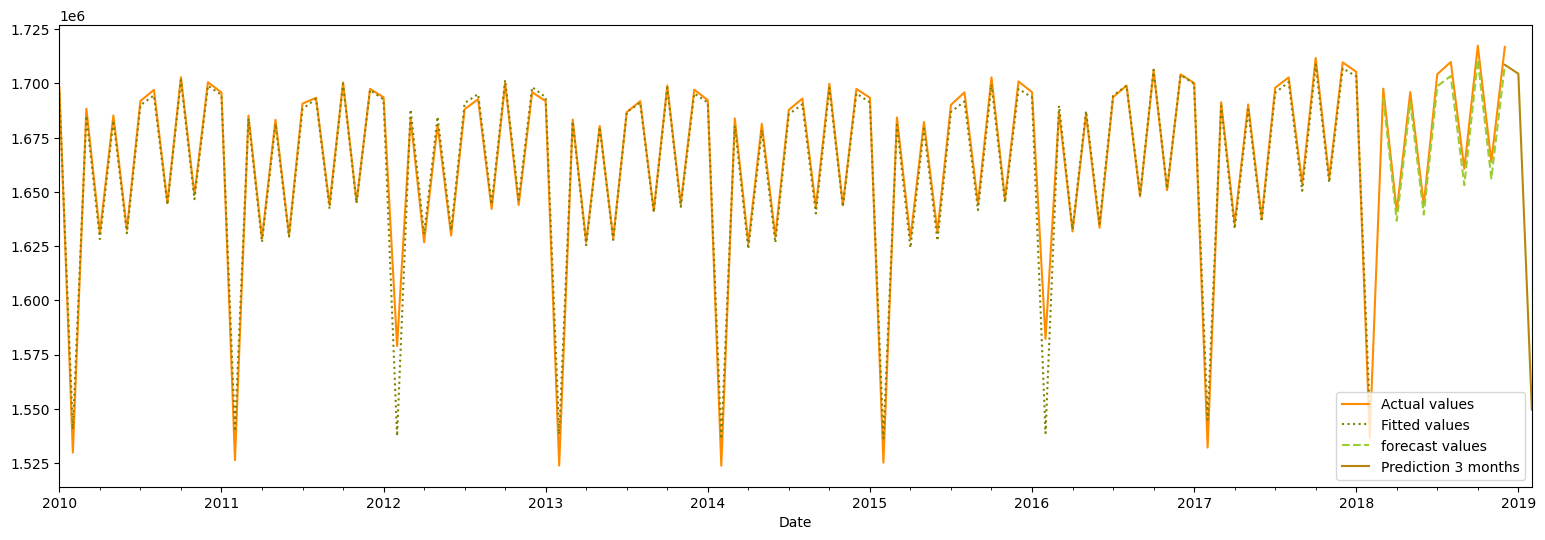

In [98]:
plt.figure(figsize=(19,6))
df['number_sold'].plot(color='darkorange',label='Actual values')
es_model.fittedvalues.plot(color='olive',label='Fitted values',linestyle='dotted')
es_model.forecast(10).plot(color='yellowgreen',label='forecast values',linestyle='dashed')
es_model.forecast(13)[-4:-1].plot(color='darkgoldenrod',label='Prediction 3 months')
plt.legend()
plt.show()

In [103]:
mean_squared_error(test,es_model.forecast(10),squared=False),r2_score(test,es_model.forecast(10))

(6178.217439361196, 0.9520796695928423)

### ARIMA Model & Evaluation

In [122]:
adfuller(df)

(0.5343272139492727,
 0.9858799331312138,
 11,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 2047.641402925065)

In [121]:
adfuller(df.diff().dropna())

(-28.855441988661354,
 0.0,
 10,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 2025.1812764578467)

In [123]:
arima_train = df[:98].diff().dropna()
arima_test = df[98:].diff().dropna()

In [125]:
arima_train.shape,arima_test.shape

((97, 1), (9, 1))

In [126]:
model = auto_arima(arima_train,trace=True,stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2364.195, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2464.902, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2403.875, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2462.946, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2366.534, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2365.198, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2366.551, Time=0.09 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2361.386, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2365.148, Time=0.06 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   97
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1175.693
Date:                Sat, 13 May 2023   AIC                           2361.386
Time:                        10:48:44   BIC                           2374.259
Sample:                    02-01-2010   HQIC                          2366.591
                         - 02-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1676      0.426     -2.740      0.006      -2.003      -0.332
ar.L2         -0.4044      0.197     -2.056      0.040      -0.790      -0.019
ma.L1         -0.2571      0.388     -0.663      0.508      -1.017       0.503
ma.L2         -0.7234      0.438     -1.651      0.099      -1.582       0.135
sigma2      2.109e+09   3.24e-10   6.51e+18      0.000    2.11e+09    2.11e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                34.88
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -1.32
Prob(H) (two-sided):                  0.88   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.94e+34. Standard errors may be unstable.
"""

In [130]:
forecast = model.predict(n_period=10)

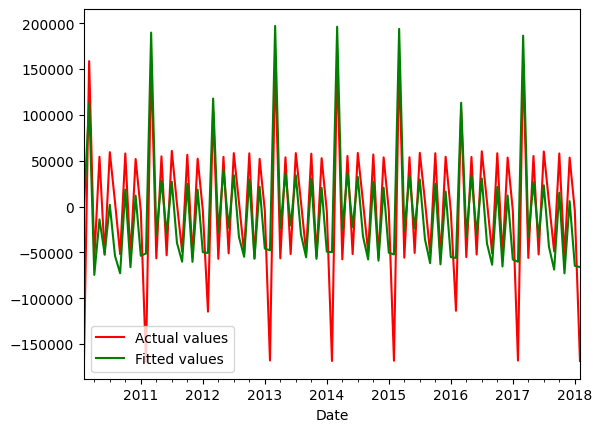

In [128]:
arima_train['number_sold'].plot(color='red',label='Actual values')
model.fittedvalues().plot(color='green',label='Fitted values')
plt.legend()
plt.show()

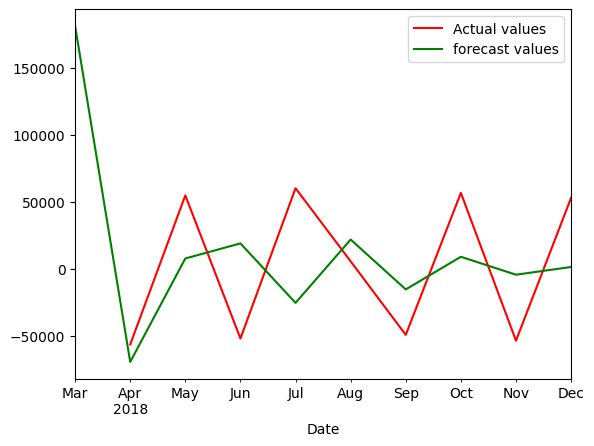

In [131]:
arima_test['number_sold'].plot(color='red',label='Actual values')
forecast.plot(color='green',label='forecast values')
plt.legend()
plt.show()

In [132]:
mean_squared_error(test,forecast,squared=False),r2_score(test,forecast)

(1673644.5944366034, -3515.5751604678912)